<a href="https://colab.research.google.com/github/batuhanyndny/notebooks/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from copy import deepcopy

data = load_iris()
X = data['data']

def kmeans(k):
  K = k
  # #of train and features
  n,c = X.shape

  # random centers
  mean = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)
  centers = np.random.randn(K,c)*std + mean #std and mean to normalize wrt data

  centers_old = np.zeros(centers.shape) 
  centers_new = deepcopy(centers)

  clusters = np.zeros(n)
  distances = np.zeros((n,K))

  error = np.linalg.norm(centers_new - centers_old)

  # while until center doesn't chage
  while error != 0:
      # distance
      for i in range(K):
          distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
      # cluster assign
      clusters = np.argmin(distances, axis = 1)
      
      centers_old = deepcopy(centers_new)
      # calc mean and update
      for i in range(K):
          centers_new[i] = np.mean(X[clusters == i], axis=0)
      error = np.linalg.norm(centers_new - centers_old)

  # Plot the data
  colors=['orange', 'blue', 'green']
  for i in range(n):
      plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(data['target'][i])])
  plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
  plt.show()

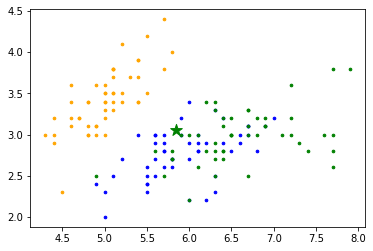

In [ ]:
kmeans(1)

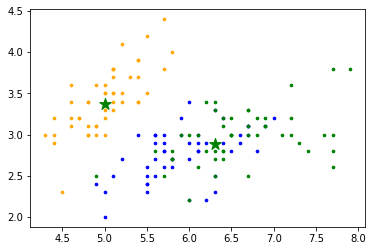

In [ ]:
kmeans(2)

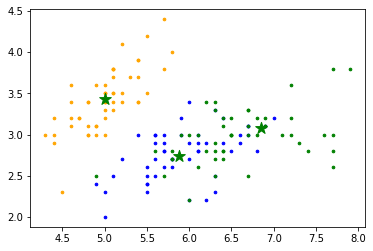

In [ ]:
kmeans(3)

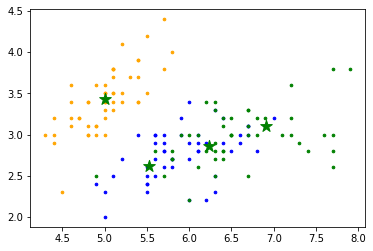

In [ ]:
kmeans(4)

In [ ]:
# Courtesy: https://www.youtube.com/watch?v=QzAaRuDskyc
# helped me a lot. Watched the full implementation and understood.

class KNearestNeighbor:
    def __init__(self, k):
        self.k = k

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def compute_distance(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            for j in range(num_train):
                distances[i, j] = np.sqrt(np.sum((X_test[i, :] - self.X_train[j, :]) ** 2))

        return distances

    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred

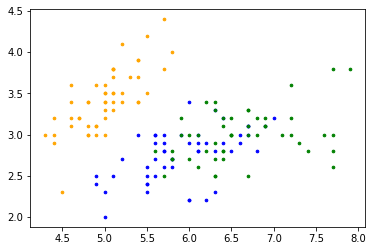

In [ ]:
knn = KNearestNeighbor(3)
X = data['data']
y = data['target']
knn.train(X, y)
pred = knn.predict(X)
colors=['orange', 'blue', 'green']
for i in range(len(X)):
  plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(pred[i])])